<a href="https://colab.research.google.com/github/Suprio85/NLP/blob/main/preprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [14]:
data = pd.read_csv('sample_data/Data.csv')
type(data)

pandas.core.frame.DataFrame

In [6]:
data.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [13]:
data.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


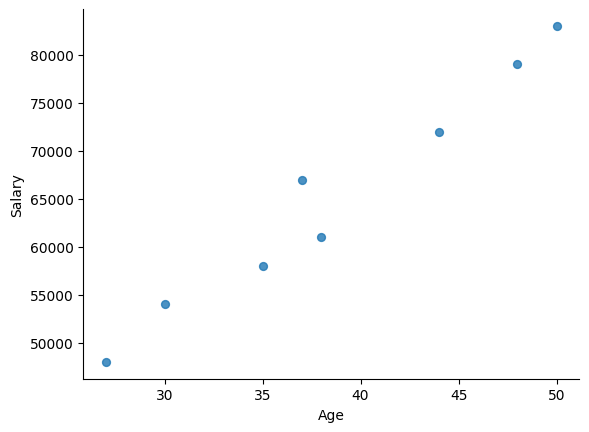

In [11]:
# @title Age vs Salary

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Age', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

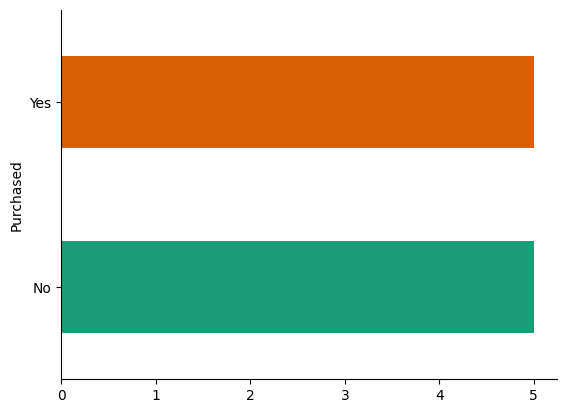

In [10]:
# @title Purchased

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Purchased').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

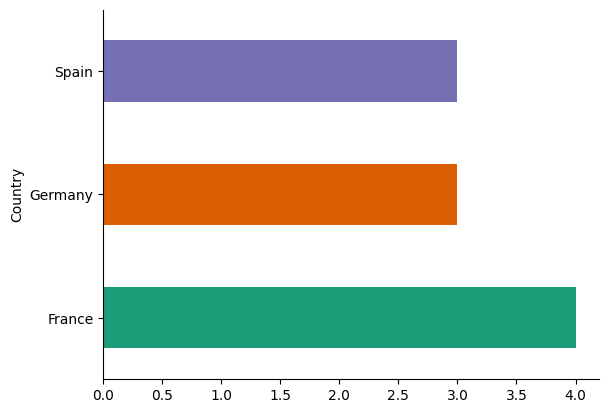

In [9]:
# @title Country

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Prepare the dataset by spliting innto fetaure and label

In [32]:
col = data.shape[1]
x = data.iloc[:,0:col-1].values
y = data.iloc[:,-1].values
x,y

(array([['France', 44.0, 72000.0],
        ['Spain', 27.0, 48000.0],
        ['Germany', 30.0, 54000.0],
        ['Spain', 38.0, 61000.0],
        ['Germany', 40.0, nan],
        ['France', 35.0, 58000.0],
        ['Spain', nan, 52000.0],
        ['France', 48.0, 79000.0],
        ['Germany', 50.0, 83000.0],
        ['France', 37.0, 67000.0]], dtype=object),
 array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
       dtype=object))

Check for missing values

In [35]:
data.isna().sum()

,0
Country,0
Age,1
Salary,1
Purchased,0


In [44]:
data2 = data.copy()
data2

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [47]:
data2.Age = data2.Age.fillna(round(data2.Age.mean()))
data2.Salary = data2.Salary.fillna(round(data2.Salary.mean()))
data2


,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [48]:
data2.isna().sum()

,0
Country,0
Age,0
Salary,0
Purchased,0


Can also do it with scikit-learn library

In [49]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [56]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x[:, 1:3] = imputer.fit_transform(x[:, 1:3])
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

Encoding the categorical values

label encoding


In [54]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x[:, 0] = encoder.fit_transform(x[:, 0])
y = encoder.fit_transform(y)
x,y


(array([[0, 44.0, 72000.0],
        [2, 27.0, 48000.0],
        [1, 30.0, 54000.0],
        [2, 38.0, 61000.0],
        [1, 40.0, 63777.77777777778],
        [0, 35.0, 58000.0],
        [2, 38.77777777777778, 52000.0],
        [0, 48.0, 79000.0],
        [1, 50.0, 83000.0],
        [0, 37.0, 67000.0]], dtype=object),
 array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1]))

One hot Encoding

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
x

array([[0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

Alternative for One hot encoding

In [58]:
pd.get_dummies(data2)

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.000000,72000.000000,True,False,False,True,False
1,27.000000,48000.000000,False,False,True,False,True
2,30.000000,54000.000000,False,True,False,True,False
3,38.000000,61000.000000,False,False,True,True,False
4,40.000000,63777.777778,False,True,False,False,True
5,35.000000,58000.000000,True,False,False,False,True
6,38.777778,52000.000000,False,False,True,True,False
7,48.000000,79000.000000,True,False,False,False,True
8,50.000000,83000.000000,False,True,False,True,False
9,37.000000,67000.000000,True,False,False,False,True


Spilliting the dataset

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_test

(array([[1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
        [1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
        [1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
        [0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
        [1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
        [0.0, 1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object),
 array([[1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
        [0.0, 1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object))

Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])
x_test[:, 3:] = sc.transform(x_test[:, 3:])
x_train, x_test

(array([[1.0, 0.0, 0.0, 1.2909944487358056, -0.19159184384578545,
         -1.0781259408412425],
        [1.0, 0.0, 1.0, -0.7745966692414834, -0.014117293757057777,
         -0.07013167641635372],
        [0.0, 1.0, 0.0, -0.7745966692414834, 0.566708506533324,
         0.633562432710455],
        [1.0, 0.0, 0.0, 1.2909944487358056, -0.30453019390224867,
         -0.30786617274297867],
        [1.0, 0.0, 0.0, 1.2909944487358056, -1.9018011447007988,
         -1.420463615551582],
        [0.0, 1.0, 0.0, -0.7745966692414834, 1.1475343068237058,
         1.232653363453549],
        [1.0, 0.0, 1.0, -0.7745966692414834, 1.4379472069688968,
         1.5749910381638885],
        [0.0, 1.0, 0.0, -0.7745966692414834, -0.7401495441200351,
         -0.5646194287757332]], dtype=object),
 array([[1.0, 0.0, 1.0, -0.7745966692414834, -1.4661817944830124,
         -0.9069571034860727],
        [0.0, 1.0, 0.0, -0.7745966692414834, -0.44973664397484414,
         0.2056403393225306]], dtype=object))